In [1]:
#importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from flask import Flask, request, render_template
import pickle
import os
import sklearn
%matplotlib inline

In [2]:
#training dataset
train_df=pd.read_excel('Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
#test dataset
test_df=pd.read_excel('Test.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
#concatinating the two datasets for a final dataset
final_df=pd.concat([test_df.assign(ind='test'), train_df.assign(ind='train')])

In [5]:
# final_df=train_df.append(test_df)
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,ind,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,test,NaN
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,test,NaN
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,test,NaN
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,test,NaN
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,test,NaN


In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  ind              13354 non-null  object 
 11  Price            10683 non-null  float64
dtypes: float64(1), object(11)
memory usage: 1.3+ MB


In [7]:
#splitting date_of_journey into date,month
final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]

In [8]:
#changing data type to int
final_df['Date']=final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)

In [9]:
final_df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [10]:
final_df['Arrival_Time']=final_df['Arrival_Time'].str.split(' ').str[0]

In [11]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
ind                   0
Price              2671
Date                  0
Month                 0
dtype: int64

In [12]:
final_df['Arrival_hour']=final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_min']=final_df['Arrival_Time'].str.split(':').str[1]

In [13]:
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int)
final_df['Arrival_min']=final_df['Arrival_min'].astype(int)

In [14]:
final_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [15]:
final_df['Dep_hour']=final_df['Dep_Time'].str.split(':').str[0]
final_df['Dep_min']=final_df['Dep_Time'].str.split(':').str[1]
final_df['Dep_hour']=final_df['Dep_hour'].astype(int)
final_df['Dep_min']=final_df['Dep_min'].astype(int)

In [16]:
final_df.drop(['Dep_Time'],axis=1,inplace=True)

In [17]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   ind              13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Date             13354 non-null  int32  
 10  Month            13354 non-null  int32  
 11  Arrival_hour     13354 non-null  int32  
 12  Arrival_min      13354 non-null  int32  
 13  Dep_hour         13354 non-null  int32  
 14  Dep_min          13354 non-null  int32  
dtypes: float64(1), int32(6), object(8)
memory usage: 1.3+ MB


In [18]:
final_df['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops', nan],
      dtype=object)

In [19]:
#mapping total stops to int values
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [20]:
final_df.drop(['Route'],axis=1,inplace=True)

In [21]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports', '1 Short layover', 'No Info', 'Red-eye flight',
       '2 Long layover'], dtype=object)

In [22]:
final_df['Destination'].unique()

array(['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata'],
      dtype=object)

In [23]:
final_df['Source'].unique()

array(['Delhi', 'Kolkata', 'Banglore', 'Mumbai', 'Chennai'], dtype=object)

In [24]:
final_df['Airline'].unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business', 'Trujet'], dtype=object)

In [25]:
final_df['Duration_hour']=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]
final_df['Duration_min']=final_df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [26]:
final_df[final_df['Duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,ind,Price,Date,Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hour,Duration_min
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,test,NaN,12,3,16,55,16,50,5m,NaN
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,train,17327.0,6,3,16,55,16,50,5m,NaN


In [27]:
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(2660,axis=0,inplace=True)

In [28]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Duration              0
Total_Stops           1
Additional_Info       0
ind                   0
Price              2670
Date                  0
Month                 0
Arrival_hour          0
Arrival_min           0
Dep_hour              0
Dep_min               0
Duration_hour         0
Duration_min       1283
dtype: int64

In [29]:
final_df['Duration_min'] = final_df['Duration_min'].fillna(0)

In [30]:
final_df['Total_Stops'] = final_df['Total_Stops'].fillna(1)

In [31]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Duration              0
Total_Stops           0
Additional_Info       0
ind                   0
Price              2670
Date                  0
Month                 0
Arrival_hour          0
Arrival_min           0
Dep_hour              0
Dep_min               0
Duration_hour         0
Duration_min          0
dtype: int64

In [32]:
final_df['Duration_hour']=final_df['Duration_hour'].astype(int)
final_df['Duration_min']=final_df['Duration_min'].astype(int)

In [33]:
final_df['Duration_hour_min']=final_df['Duration_hour']*60

In [34]:
final_df.drop(['Duration'],axis=1,inplace=True)

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
final_df['Airline']=le.fit_transform(final_df['Airline'])
final_df['Source']=le.fit_transform(final_df['Source'])
final_df['Destination']=le.fit_transform(final_df['Destination'])

In [36]:
final_df.shape

(13351, 16)

In [37]:
pd.get_dummies(final_df,columns=['Airline','Source','Destination'],drop_first=True)

,Total_Stops,Additional_Info,ind,Price,Date,Month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,...,Airline_11,Source_1,Source_2,Source_3,Source_4,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5
0,1.0,No info,test,NaN,6,6,4,25,17,30,...,0,0,1,0,0,1,0,0,0,0
1,1.0,No info,test,NaN,12,5,10,20,6,20,...,0,0,0,1,0,0,0,0,0,0
2,1.0,In-flight meal not included,test,NaN,21,5,19,0,19,15,...,0,0,1,0,0,1,0,0,0,0
3,1.0,No info,test,NaN,21,5,21,0,8,0,...,0,0,1,0,0,1,0,0,0,0
4,0.0,No info,test,NaN,24,6,2,45,23,55,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,No info,train,4107.0,9,4,22,25,19,55,...,0,0,0,1,0,0,0,0,0,0
10679,0.0,No info,train,4145.0,27,4,23,20,20,45,...,0,0,0,1,0,0,0,0,0,0
10680,0.0,No info,train,7229.0,27,4,11,20,8,20,...,0,0,0,0,0,0,1,0,0,0
10681,0.0,No info,train,12648.0,1,3,14,10,11,30,...,0,0,0,0,0,0,0,0,0,1


In [38]:
final_df['Total_Duration']=final_df['Duration_hour_min']+final_df['Duration_min']
final_df.drop(['Duration_hour','Duration_min','Duration_hour_min','Additional_Info'],axis=1,inplace=True)

In [39]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Airline         13351 non-null  int32  
 1   Source          13351 non-null  int32  
 2   Destination     13351 non-null  int32  
 3   Total_Stops     13351 non-null  float64
 4   ind             13351 non-null  object 
 5   Price           10681 non-null  float64
 6   Date            13351 non-null  int32  
 7   Month           13351 non-null  int32  
 8   Arrival_hour    13351 non-null  int32  
 9   Arrival_min     13351 non-null  int32  
 10  Dep_hour        13351 non-null  int32  
 11  Dep_min         13351 non-null  int32  
 12  Total_Duration  13351 non-null  int32  
dtypes: float64(2), int32(10), object(1)
memory usage: 938.7+ KB


In [40]:
final_df.isnull().sum()

Airline              0
Source               0
Destination          0
Total_Stops          0
ind                  0
Price             2670
Date                 0
Month                0
Arrival_hour         0
Arrival_min          0
Dep_hour             0
Dep_min              0
Total_Duration       0
dtype: int64

In [41]:
final_df.shape

(13351, 13)

In [42]:
#dividing the final dataset again into training and testing data
train=final_df[final_df['ind'].eq('train')]
test=final_df[final_df['ind'].eq('test')]

In [43]:
train.drop('ind',axis=1,inplace=True)
test.drop('ind',axis=1,inplace=True)

C:\Users\Gurjeet Singh\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


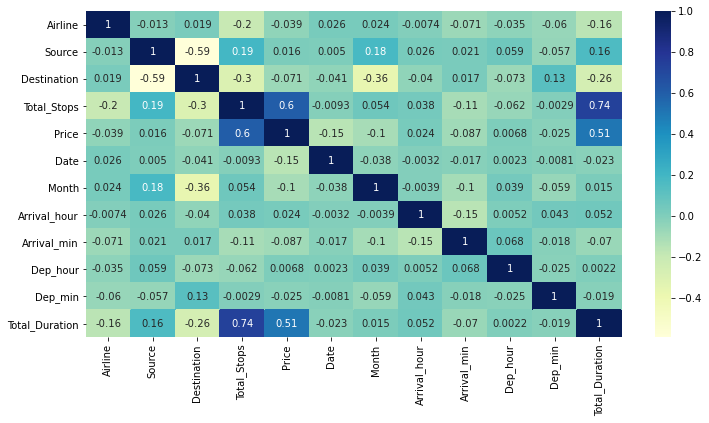

In [44]:
#corellation matrix
plt.figure(figsize = (12,6))
sns.heatmap(train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [45]:
x=train.drop('Price',axis=1)
y=train['Price']

In [46]:
#finding the important features using ExtraTreesRegressor.
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

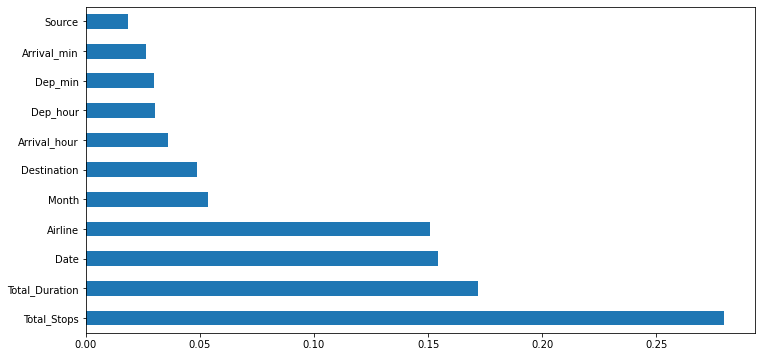

In [47]:
plt.figure(figsize = (12,6))
feature_importance = pd.Series(selection.feature_importances_, index=x.columns)
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [49]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7476, 11), (3205, 11), (7476,), (3205,))

In [50]:
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge, HuberRegressor, LogisticRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

In [51]:
models = [['LinearRegression : ', LinearRegression()],
          ['ElasticNet :', ElasticNet()],
          ['Lasso : ', Lasso()],
          ['Ridge : ', Ridge()],
          ['KNeighborsRegressor : ', KNeighborsRegressor()],
          ['DecisionTreeRegressor : ', DecisionTreeRegressor()],
          ['RandomForestRegressor : ', RandomForestRegressor()],
          ['SVR : ', SVR()],
          ['AdaBoostRegressor : ', AdaBoostRegressor()],
          ['GradientBoostingRegressor : ', GradientBoostingRegressor()],
          ['ExtraTreeRegressor : ', ExtraTreeRegressor()],
          ['HuberRegressor : ', HuberRegressor()],
          ['BayesianRidge : ', BayesianRidge()]]

In [53]:
for name, model in models:
    model=model
    model.fit(x_train, y_train)
    print(name, model.score(x_train, y_train))
    predictions = model.predict(x_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

LinearRegression :  0.4297055395587125
LinearRegression :  3453.1653153504344
ElasticNet : 0.36030269517369906
ElasticNet : 3694.278413249678
Lasso :  0.42970517688094234
Lasso :  3453.3045424688476
Ridge :  0.42970547711445783
Ridge :  3453.1994950573344
KNeighborsRegressor :  0.7085069039732896
KNeighborsRegressor :  3177.0607640017097
DecisionTreeRegressor :  0.9735298260672316
DecisionTreeRegressor :  2506.299148463598
RandomForestRegressor :  0.9538201727853202
RandomForestRegressor :  2041.7925868956356
SVR :  0.14232857247388042
SVR :  4271.842557307096
AdaBoostRegressor :  0.43214767128291554
AdaBoostRegressor :  3664.230283020296
GradientBoostingRegressor :  0.7846911957956711
GradientBoostingRegressor :  2161.5851361513187
ExtraTreeRegressor :  0.9735298260672316
ExtraTreeRegressor :  2583.002002312055
HuberRegressor :  0.2429107788314182
HuberRegressor :  4030.887732316549
BayesianRidge :  0.4297002790423463
BayesianRidge :  3453.4933705167227


C:\Users\Gurjeet Singh\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [54]:
#hyperparameter tuning
#considering 2 algos whose RMSE value is lowest
algorithms = {
            'RandomForestRegressor' : {'model' : RandomForestRegressor(),'param' : {
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]}},
    
            'GradientBoostingRegressor' : {'model' : GradientBoostingRegressor(),'param' : {
            'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'criterion' : ['friedman_mse', 'mse']}}
            }

In [55]:
score = []

for name, mp in algorithms.items() :
    rs = RandomizedSearchCV(estimator = mp['model'], param_distributions = mp['param'], cv = 10, n_jobs=-1, verbose=3)
    rs.fit(x_train, y_train)
    score.append({
        'model': name,
        'score' : rs.best_score_,
        'params' : rs.best_params_
    })

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [56]:
final = pd.DataFrame(score, columns=['model', 'score', 'params'])
final

,model,score,params
0,RandomForestRegressor,0.814779,"{'n_estimators': 2100, 'min_samples_split': 4,..."
1,GradientBoostingRegressor,0.804038,"{'n_estimators': 1000, 'learning_rate': 0.25, ..."


In [57]:
#taking random forest as final algo as it has higher accuracy score
final['params'][0]

{'n_estimators': 2100,
 'min_samples_split': 4,
 'max_features': 'auto',
 'max_depth': 13}

In [59]:
#training the model using new parameters
regressor = RandomForestRegressor(n_estimators = 2100, min_samples_split=4, max_features = 'auto', max_depth = 13)
regressor.fit(x_train, y_train)
prediction = regressor.predict(x_test)
print('RMSE : {}'.format(np.sqrt(mean_squared_error(y_test, prediction))))

RMSE : 1920.7771886719183


In [60]:
regressor.score(x_train, y_train), regressor.score(x_test, y_test)

(0.9255760396805417, 0.8277472556420813)

In [61]:
prediction[0]

10319.476070109891

In [62]:
train['Price'][0]

3897.0

In [63]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

MAE: 1126.769543260342
MSE: 3689385.008522398
RMSE: 1920.7771886719183


In [64]:
from sklearn import metrics
metrics.r2_score(y_test, prediction)

0.8277472556420813

In [65]:
import pickle
file = open('flight_price.pkl', 'wb')
pickle.dump(regressor, file)

In [66]:
model = open('flight_price.pkl','rb')
forest = pickle.load(model)

In [67]:
y_prediction = forest.predict(x_test)

In [68]:
metrics.r2_score(y_test, y_prediction)

0.8277472556420813